In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
# generate a list of column names
new_columns = list(range(-80, 19))

In [3]:
data= pd.read_csv(r"D:\ten organism\train data\santalucia bac vs. shuffled ten.csv")
downstream= pd.read_csv(r"D:\downstream control\train organism\train_downstream_santalucia.csv")

In [4]:
data.isnull().values.any()

False

In [5]:
data.head(5)

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-1.28,-1.44,-1.44,-1.44,-1.44,-1.00,-1.00,-1.28,-1.84,-1.28,...,-1.28,-1.84,-2.24,-1.44,-1.00,-0.58,-1.30,-1.84,-1.30,1
1,-1.28,-1.28,-1.84,-1.45,-1.00,-1.00,-0.88,-1.28,-1.45,-1.00,...,-1.30,-1.30,-1.00,-1.45,-1.45,-1.45,-1.45,-1.00,-0.88,1
2,-0.58,-0.88,-1.00,-1.44,-1.44,-1.44,-1.30,-1.00,-1.00,-1.30,...,-2.24,-1.84,-1.30,-0.88,-1.44,-1.44,-1.00,-1.00,-1.44,1
3,-1.30,-2.27,-2.24,-1.84,-1.30,-1.00,-0.88,-1.00,-1.00,-0.58,...,-1.28,-1.45,-0.88,-1.44,-1.84,-1.30,-1.30,-2.27,-1.84,1
4,-0.58,-1.00,-0.88,-1.00,-1.28,-1.28,-1.00,-0.58,-1.45,-1.45,...,-2.24,-1.30,-1.00,-1.30,-1.30,-1.00,-1.00,-1.00,-1.00,1


In [6]:
downstream.head(5)

,150,151,152,153,154,155,156,157,158,159,...,239,240,241,242,243,244,245,246,247,248
0,-1.30,-1.44,-0.58,-0.88,-1.28,-1.45,-0.88,-1.00,-1.00,-0.58,...,-1.30,-2.27,-1.84,-2.24,-1.84,-1.84,-1.30,-1.00,-1.30,-1.44
1,-1.84,-1.30,-1.30,-1.30,-1.00,-1.30,-1.84,-1.30,-1.00,-1.45,...,-1.44,-2.27,-1.84,-2.24,-2.27,-1.45,-0.88,-0.58,-1.45,-2.24
2,-1.44,-1.84,-1.30,-1.00,-1.30,-1.30,-1.45,-1.45,-1.00,-1.45,...,-1.00,-1.00,-1.45,-1.45,-1.30,-2.27,-1.28,-1.00,-1.44,-1.30
3,-1.44,-1.44,-1.30,-1.00,-0.88,-1.00,-1.00,-1.44,-1.44,-1.00,...,-2.24,-2.27,-1.28,-1.44,-2.27,-1.28,-1.00,-1.00,-0.58,-1.00
4,-1.00,-1.00,-1.30,-1.30,-1.45,-2.24,-2.27,-1.28,-1.28,-1.28,...,-1.28,-1.28,-1.28,-1.44,-1.30,-0.88,-1.44,-1.30,-0.88,-0.58


### Preprocessing Promoter data

In [7]:
promoter_seq = data[data['label'] == 1]
promoter_seq.shape

(14669, 100)

In [8]:
promoter_no_label=promoter_seq.drop(columns=['label'])
promoter_no_label.columns=new_columns
promoter_no_label.shape

(14669, 99)

In [9]:
promoter_without_label=promoter_no_label
promoter_without_label.shape

(14669, 99)

In [10]:
promoter_without_label['label']=1

In [11]:
promoter= promoter_without_label
promoter['label']=promoter['label'].astype(int)
promoter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14669 entries, 0 to 14668
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   -80     14669 non-null  float64
 1   -79     14669 non-null  float64
 2   -78     14669 non-null  float64
 3   -77     14669 non-null  float64
 4   -76     14669 non-null  float64
 5   -75     14669 non-null  float64
 6   -74     14669 non-null  float64
 7   -73     14669 non-null  float64
 8   -72     14669 non-null  float64
 9   -71     14669 non-null  float64
 10  -70     14669 non-null  float64
 11  -69     14669 non-null  float64
 12  -68     14669 non-null  float64
 13  -67     14669 non-null  float64
 14  -66     14669 non-null  float64
 15  -65     14669 non-null  float64
 16  -64     14669 non-null  float64
 17  -63     14669 non-null  float64
 18  -62     14669 non-null  float64
 19  -61     14669 non-null  float64
 20  -60     14669 non-null  float64
 21  -59     14669 non-null  float64
 2

### Preprocessing Downstream Data

In [12]:
downstream

,150,151,152,153,154,155,156,157,158,159,...,239,240,241,242,243,244,245,246,247,248
0,-1.30,-1.44,-0.58,-0.88,-1.28,-1.45,-0.88,-1.00,-1.00,-0.58,...,-1.30,-2.27,-1.84,-2.24,-1.84,-1.84,-1.30,-1.00,-1.30,-1.44
1,-1.84,-1.30,-1.30,-1.30,-1.00,-1.30,-1.84,-1.30,-1.00,-1.45,...,-1.44,-2.27,-1.84,-2.24,-2.27,-1.45,-0.88,-0.58,-1.45,-2.24
2,-1.44,-1.84,-1.30,-1.00,-1.30,-1.30,-1.45,-1.45,-1.00,-1.45,...,-1.00,-1.00,-1.45,-1.45,-1.30,-2.27,-1.28,-1.00,-1.44,-1.30
3,-1.44,-1.44,-1.30,-1.00,-0.88,-1.00,-1.00,-1.44,-1.44,-1.00,...,-2.24,-2.27,-1.28,-1.44,-2.27,-1.28,-1.00,-1.00,-0.58,-1.00
4,-1.00,-1.00,-1.30,-1.30,-1.45,-2.24,-2.27,-1.28,-1.28,-1.28,...,-1.28,-1.28,-1.28,-1.44,-1.30,-0.88,-1.44,-1.30,-0.88,-0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,-0.88,-1.00,-1.44,-2.27,-1.28,-1.44,-1.84,-1.44,-1.00,-1.44,...,-1.30,-1.30,-1.30,-1.44,-1.00,-1.44,-2.27,-1.84,-1.84,-1.45
14665,-1.30,-1.00,-1.30,-1.44,-1.28,-1.45,-1.45,-1.84,-1.45,-1.30,...,-0.88,-1.00,-0.58,-1.45,-1.28,-1.28,-1.84,-1.28,-0.58,-1.45
14666,-1.00,-1.00,-1.00,-1.00,-1.44,-1.84,-2.27,-2.24,-1.44,-0.58,...,-1.00,-0.58,-1.30,-1.30,-1.45,-1.45,-1.30,-1.44,-1.00,-1.44
14667,-2.24,-1.30,-1.00,-0.88,-1.44,-1.84,-1.30,-1.00,-1.30,-1.30,...,-0.58,-0.88,-1.00,-1.00,-1.00,-1.00,-0.58,-1.45,-1.45,-1.45


In [13]:
downstream.columns= new_columns
downstream_no_label=downstream
downstream['label']= 0
downstream['label']= downstream['label'].astype(int)

In [14]:
downstream

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-1.30,-1.44,-0.58,-0.88,-1.28,-1.45,-0.88,-1.00,-1.00,-0.58,...,-2.27,-1.84,-2.24,-1.84,-1.84,-1.30,-1.00,-1.30,-1.44,0
1,-1.84,-1.30,-1.30,-1.30,-1.00,-1.30,-1.84,-1.30,-1.00,-1.45,...,-2.27,-1.84,-2.24,-2.27,-1.45,-0.88,-0.58,-1.45,-2.24,0
2,-1.44,-1.84,-1.30,-1.00,-1.30,-1.30,-1.45,-1.45,-1.00,-1.45,...,-1.00,-1.45,-1.45,-1.30,-2.27,-1.28,-1.00,-1.44,-1.30,0
3,-1.44,-1.44,-1.30,-1.00,-0.88,-1.00,-1.00,-1.44,-1.44,-1.00,...,-2.27,-1.28,-1.44,-2.27,-1.28,-1.00,-1.00,-0.58,-1.00,0
4,-1.00,-1.00,-1.30,-1.30,-1.45,-2.24,-2.27,-1.28,-1.28,-1.28,...,-1.28,-1.28,-1.44,-1.30,-0.88,-1.44,-1.30,-0.88,-0.58,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,-0.88,-1.00,-1.44,-2.27,-1.28,-1.44,-1.84,-1.44,-1.00,-1.44,...,-1.30,-1.30,-1.44,-1.00,-1.44,-2.27,-1.84,-1.84,-1.45,0
14665,-1.30,-1.00,-1.30,-1.44,-1.28,-1.45,-1.45,-1.84,-1.45,-1.30,...,-1.00,-0.58,-1.45,-1.28,-1.28,-1.84,-1.28,-0.58,-1.45,0
14666,-1.00,-1.00,-1.00,-1.00,-1.44,-1.84,-2.27,-2.24,-1.44,-0.58,...,-0.58,-1.30,-1.30,-1.45,-1.45,-1.30,-1.44,-1.00,-1.44,0
14667,-2.24,-1.30,-1.00,-0.88,-1.44,-1.84,-1.30,-1.00,-1.30,-1.30,...,-0.88,-1.00,-1.00,-1.00,-1.00,-0.58,-1.45,-1.45,-1.45,0


### Plotting Graph

In [15]:
for_line= pd.DataFrame(promoter_no_label.mean())
downstream_line= pd.DataFrame(downstream_no_label.mean())

In [16]:
for_line.reset_index(drop=False, inplace=True)
for_line.drop(for_line.index[-1], inplace=True)
for_line['index']=for_line['index'].astype(int)

downstream_line.reset_index(drop=False, inplace=True)
downstream_line.drop(downstream_line.index[-1], inplace=True)

for_line

,index,0
0,-80,-1.436847
1,-79,-1.439302
2,-78,-1.446063
3,-77,-1.447048
4,-76,-1.441595
...,...,...
94,14,-1.407184
95,15,-1.417233
96,16,-1.412376
97,17,-1.413293


In [17]:
downstream_columns= list(range(150,249))
downstream_line['downstream position']= downstream_columns
downstream_line['index']=downstream_line['index'].astype(int)
downstream_line

,index,0,downstream position
0,-80,-1.497292,150
1,-79,-1.479691,151
2,-78,-1.484533,152
3,-77,-1.506481,153
4,-76,-1.481634,154
...,...,...,...
94,14,-1.489642,244
95,15,-1.492439,245
96,16,-1.509333,246
97,17,-1.491107,247


In [18]:
downstream_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                99 non-null     int32  
 1   0                    99 non-null     float64
 2   downstream position  99 non-null     int64  
dtypes: float64(1), int32(1), int64(1)
memory usage: 2.1 KB


In [19]:
for_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   99 non-null     int32  
 1   0       99 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 1.3 KB


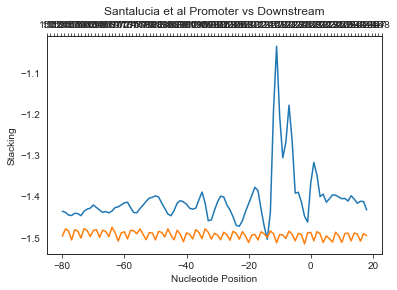

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')
# create the Seaborn line plots
plot = sns.lineplot(x='index', y=0, data=for_line)
plot = sns.lineplot(x='index', y=0, data=downstream_line)

# create a twin Axes object for the new x-axis
ax2 = plot.twiny()

# set the new x-axis tick positions and labels
ax2.set_xticks(downstream_line.index)
ax2.set_xticklabels(downstream_line['downstream position'])

# set the x-axis and y-axis labels and title
plot.set(xlabel="Nucleotide Position", ylabel="Stacking", title='Santalucia et al Promoter vs Downstream')

# show the plot
plt.show()


### Preparing Training Data

In [21]:
data= pd.concat([promoter,downstream])

In [22]:
data.reset_index(drop=True, inplace=True)

In [23]:
data

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-1.28,-1.44,-1.44,-1.44,-1.44,-1.00,-1.00,-1.28,-1.84,-1.28,...,-1.28,-1.84,-2.24,-1.44,-1.00,-0.58,-1.30,-1.84,-1.30,1
1,-1.28,-1.28,-1.84,-1.45,-1.00,-1.00,-0.88,-1.28,-1.45,-1.00,...,-1.30,-1.30,-1.00,-1.45,-1.45,-1.45,-1.45,-1.00,-0.88,1
2,-0.58,-0.88,-1.00,-1.44,-1.44,-1.44,-1.30,-1.00,-1.00,-1.30,...,-2.24,-1.84,-1.30,-0.88,-1.44,-1.44,-1.00,-1.00,-1.44,1
3,-1.30,-2.27,-2.24,-1.84,-1.30,-1.00,-0.88,-1.00,-1.00,-0.58,...,-1.28,-1.45,-0.88,-1.44,-1.84,-1.30,-1.30,-2.27,-1.84,1
4,-0.58,-1.00,-0.88,-1.00,-1.28,-1.28,-1.00,-0.58,-1.45,-1.45,...,-2.24,-1.30,-1.00,-1.30,-1.30,-1.00,-1.00,-1.00,-1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29333,-0.88,-1.00,-1.44,-2.27,-1.28,-1.44,-1.84,-1.44,-1.00,-1.44,...,-1.30,-1.30,-1.44,-1.00,-1.44,-2.27,-1.84,-1.84,-1.45,0
29334,-1.30,-1.00,-1.30,-1.44,-1.28,-1.45,-1.45,-1.84,-1.45,-1.30,...,-1.00,-0.58,-1.45,-1.28,-1.28,-1.84,-1.28,-0.58,-1.45,0
29335,-1.00,-1.00,-1.00,-1.00,-1.44,-1.84,-2.27,-2.24,-1.44,-0.58,...,-0.58,-1.30,-1.30,-1.45,-1.45,-1.30,-1.44,-1.00,-1.44,0
29336,-2.24,-1.30,-1.00,-0.88,-1.44,-1.84,-1.30,-1.00,-1.30,-1.30,...,-0.88,-1.00,-1.00,-1.00,-1.00,-0.58,-1.45,-1.45,-1.45,0


# Prediction using machine learning

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve,auc, RocCurveDisplay
from statistics import mean
import sklearn.metrics as metrics
from statistics import mean
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score, matthews_corrcoef, confusion_matrix

In [29]:

X = data.drop('label', axis=1)
y = data['label']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109)

#inputs = np.concatenate((X_train, X_test), axis=0)
#targets = np.concatenate((y_train, y_test), axis=0)





In [30]:
feature_list=list(X_train.columns)

In [31]:
#'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300

In [32]:
X.shape

(29338, 99)

## Model Training

In [33]:
kfold = KFold(n_splits=10, shuffle=True)
clf = svm.SVC(kernel='rbf')
fold_no = 1

accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []
mcc_list = []
specificity_list = []

for train, test in kfold.split(inputs, targets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

    inputs = np.concatenate((X_train, X_test), axis=0)
    targets = np.concatenate((y_train, y_test), axis=0)

    trainX, testX = inputs[train], inputs[test]
    trainY, testY = targets[train], targets[test]
    clf.fit(trainX, trainY)
    y_pred = clf.predict(testX)
    accuracy_list.append(accuracy_score(testY, y_pred))
    precision_list.append(precision_score(testY, y_pred))
    recall_list.append(recall_score(testY, y_pred))
    f1_score_list.append(f1_score(testY, y_pred))
    
    # Calculate MCC
    mcc = matthews_corrcoef(testY, y_pred)
    mcc_list.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = confusion_matrix(testY, y_pred).ravel()
    specificity = tn / (tn + fp)
    specificity_list.append(specificity)
    
    print("Fold {}: Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
        fold_no, accuracy_list[-1], precision_list[-1], recall_list[-1], f1_score_list[-1], mcc_list[-1], specificity_list[-1]))
    
    fold_no += 1

Fold 1: Accuracy: 0.8220858895705522, Precision: 0.823045267489712, Recall: 0.819672131147541, F1 Score: 0.8213552361396305, MCC: 0.6441727028787358, Specificity: 0.8244897959183674
Fold 2: Accuracy: 0.8241308793456033, Precision: 0.8155844155844156, Recall: 0.8440860215053764, F1 Score: 0.8295904887714664, MCC: 0.6484190896042221, Specificity: 0.8035961272475796
Fold 3: Accuracy: 0.8186775732788003, Precision: 0.8262386601535241, Recall: 0.8070892978868439, F1 Score: 0.8165517241379311, MCC: 0.6375263940073561, Specificity: 0.8302658486707567
Fold 4: Accuracy: 0.8241308793456033, Precision: 0.8386638237384506, Recall: 0.8032675289312458, F1 Score: 0.8205841446453408, MCC: 0.6488610533191024, Specificity: 0.8450511945392492
Fold 5: Accuracy: 0.8312883435582822, Precision: 0.8279711096520026, Recall: 0.8440428380187416, F1 Score: 0.8359297315213787, MCC: 0.6624690914963182, Specificity: 0.8180555555555555
Fold 6: Accuracy: 0.8159509202453987, Precision: 0.8070652173913043, Recall: 0.822

In [34]:
accuracy_list

[0.8220858895705522,
 0.8241308793456033,
 0.8186775732788003,
 0.8241308793456033,
 0.8312883435582822,
 0.8159509202453987,
 0.8176550783912747,
 0.8125426039536469,
 0.8155472212751449,
 0.8135015342652574]

In [35]:
precision_list

[0.823045267489712,
 0.8155844155844156,
 0.8262386601535241,
 0.8386638237384506,
 0.8279711096520026,
 0.8070652173913043,
 0.8387319090282563,
 0.8029891304347826,
 0.8057795698924731,
 0.797979797979798]

In [36]:
recall_list

[0.819672131147541,
 0.8440860215053764,
 0.8070892978868439,
 0.8032675289312458,
 0.8440428380187416,
 0.8227146814404432,
 0.8017127799736495,
 0.8196948682385575,
 0.8263266712611992,
 0.827513966480447]

In [37]:
specificity_list

[0.8244897959183674,
 0.8035961272475796,
 0.8302658486707567,
 0.8450511945392492,
 0.8180555555555555,
 0.8093959731543624,
 0.8347457627118644,
 0.8056300268096515,
 0.8049932523616734,
 0.8001332445036642]

In [38]:
f1_score_list 

[0.8213552361396305,
 0.8295904887714664,
 0.8165517241379311,
 0.8205841446453408,
 0.8359297315213787,
 0.8148148148148148,
 0.8198046480296396,
 0.8112560054907344,
 0.8159237835998638,
 0.8124785738772712]

In [39]:
mcc_list

[0.6441727028787358,
 0.6484190896042221,
 0.6375263940073561,
 0.6488610533191024,
 0.6624690914963182,
 0.6320366320692942,
 0.63611165188987,
 0.6252377180190963,
 0.6313525140825584,
 0.627523437029034]

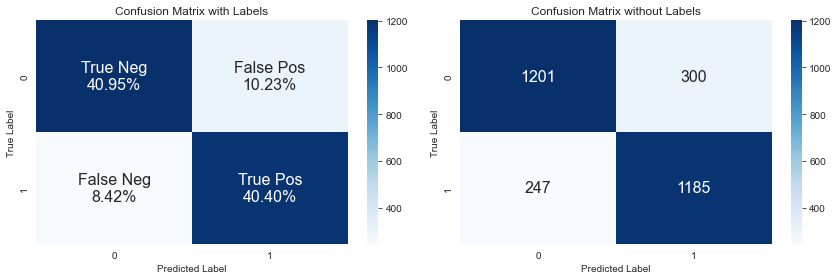

In [40]:
train_cm= confusion_matrix(testY, y_pred)

# Define labels for the four quadrants of the confusion matrix
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Reshape confusion matrix into a 1D array for plotting
train_cm_array = train_cm.ravel()

# Compute percentage values for each quadrant
percentages = ['{0:.2%}'.format(value) for value in train_cm_array / np.sum(train_cm_array)]

# Combine labels and percentages into a list of strings for plotting
labels = [f"{v1}\n{v2}" for v1, v2 in zip(labels, percentages)]

# Reshape labels into a 2D array for plotting
labels = np.asarray(labels).reshape(2,2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot with labels
#sns.set(font_scale=1.4, ax=axes[0])
sns.heatmap(train_cm, annot=labels, annot_kws={"size": 16}, cmap='Blues', fmt='', ax=axes[0])
axes[0].set_title('Confusion Matrix with Labels')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot without labels
#sns.set(font_scale=1.4, ax=axes[1])
sns.heatmap(train_cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix without Labels')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


In [41]:
print(mean(accuracy_list))

0.8195510923229564


C:\Users\Subhojit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


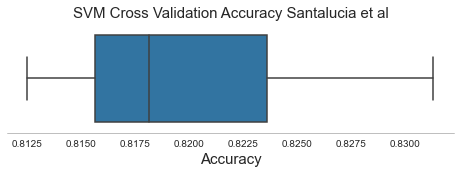

In [42]:
# Create a new figure with a larger size
plt.figure(figsize=(8,2))

# Create the boxplot with a custom title and color
ax = sns.boxplot(np.array(accuracy_list))
#sns.set(style='white')
#sns.set_palette('default')
plt.title('SVM Cross Validation Accuracy Santalucia et al', fontsize=15)  # Set font size of title
plt.xlabel('Accuracy', fontsize=15)  # Set font size of x-label

# Remove top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Remove left and bottom ticks
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

# Remove left and bottom spines and set their color to gray
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(0.5)

# Display the plot
plt.show()


In [43]:
print("Accuracy:",metrics.accuracy_score(testY, y_pred))
print("Precision:",metrics.precision_score(testY, y_pred))
print("Recall:",metrics.recall_score(testY, y_pred))
print("f1_score:",metrics.f1_score(testY, y_pred))

Accuracy: 0.8135015342652574
Precision: 0.797979797979798
Recall: 0.827513966480447
f1_score: 0.8124785738772712


C:\Users\Subhojit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


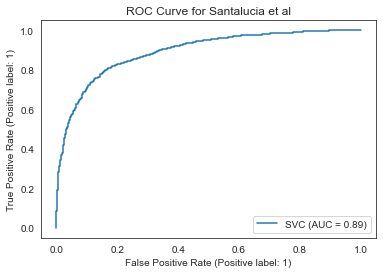

In [44]:
roc_curve= metrics.plot_roc_curve(clf, testX, testY)
roc_curve.ax_.set_title("ROC Curve for Santalucia et al")
plt.show()

C:\Users\Subhojit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


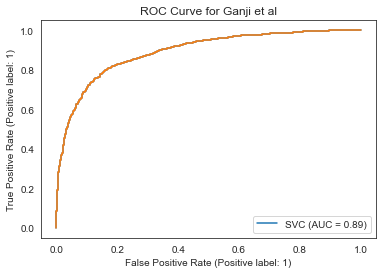

In [45]:
import pandas as pd

# Assuming roc_curve is the object returned by metrics.plot_roc_curve
roc_curve = metrics.plot_roc_curve(clf, testX, testY)

# Extract the data points from roc_curve
fpr = roc_curve.fpr
tpr = roc_curve.tpr

# Create a DataFrame
roc_df = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})

roc_df.to_csv('d:/ROC Curve data/downstream_santalucia_svm_roc_df.csv', index=False)

# Plot the ROC curve from the DataFrame
plt.plot(roc_df['False Positive Rate'], roc_df['True Positive Rate'])
plt.title("ROC Curve for Ganji et al")
plt.show()


# Using Shapley

In [65]:
!pip install shap

In [66]:
import shap


In [67]:
promoter.shape

(14669, 100)

### X_PCA promotor

In [68]:
import random

# set the random seed to ensure reproducibility
#random.seed(123)

# generate 40 random numbers between 1 to 15000
random_numbers = [random.randint(1, 10000) for _ in range(40)]

# print the random numbers
print(random_numbers)


[8081, 2132, 8982, 4223, 9217, 7124, 339, 9222, 9621, 4958, 2580, 3559, 6928, 7030, 6772, 9517, 156, 3509, 5088, 5143, 7997, 6396, 2568, 1593, 9692, 5680, 3230, 4048, 2484, 9609, 1561, 8603, 9344, 2240, 4419, 2961, 8854, 1297, 6368, 1698]


In [69]:
X_PCA_promoters = X.loc[[8499, 6345, 8807, 5017, 2395, 4771, 6378, 6038, 2073, 8765, 
                         5534, 8473, 1959, 2733, 9656, 6329, 7081, 1017, 2229, 7451, 338, 5727, 7369, 7392, 4978, 7029, 463, 2599, 8546, 
                         5323, 8468, 8434, 9119, 2251, 5630, 8195, 1717, 8937, 6046, 3685]]

In [70]:
X_PCA_promoters

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,9,10,11,12,13,14,15,16,17,18
8499,-2.17,-2.18,-1.76,-1.44,-2.81,-1.44,-1.46,-2.99,-1.46,-2.18,...,-2.99,-1.42,-2.99,-1.76,-1.42,-1.76,-2.18,-2.81,-1.42,-2.99
6345,-2.81,-1.44,-2.81,-1.44,-1.76,-2.99,-1.42,-2.18,-2.17,-2.18,...,-1.44,-1.95,-1.46,-2.18,-1.46,-2.81,-1.44,-1.76,-2.18,-1.46
8807,-1.44,-1.76,-2.99,-1.42,-2.99,-1.46,-1.44,-1.76,-2.18,-1.46,...,-1.95,-1.44,-1.76,-2.99,-1.42,-2.18,-2.17,-1.95,-1.95,-2.18
5017,-2.81,-1.44,-2.17,-1.44,-2.81,-1.95,-1.95,-1.44,-2.81,-1.52,...,-2.81,-1.76,-1.42,-2.18,-2.81,-1.76,-1.42,-2.81,-1.95,-2.18
2395,-1.44,-1.46,-2.18,-1.46,-2.81,-2.18,-1.44,-1.46,-1.76,-1.76,...,-2.17,-1.95,-1.52,-2.17,-1.95,-2.18,-1.46,-1.95,-1.95,-1.95
4771,-1.46,-2.81,-1.44,-2.18,-2.81,-1.46,-1.95,-1.44,-1.76,-2.99,...,-2.18,-1.76,-1.76,-1.44,-2.81,-1.42,-2.18,-2.17,-1.44,-2.99
6378,-2.18,-1.46,-1.76,-2.99,-1.44,-2.81,-1.44,-1.95,-2.17,-1.52,...,-1.76,-2.99,-1.44,-1.95,-2.81,-1.46,-1.52,-1.95,-2.17,-1.44
6038,-1.46,-1.52,-2.17,-2.18,-1.46,-1.52,-2.81,-1.46,-1.52,-2.17,...,-1.52,-2.17,-1.95,-2.18,-1.46,-2.18,-1.42,-2.18,-2.17,-1.52
2073,-1.42,-2.81,-1.52,-1.46,-2.99,-1.44,-1.46,-2.99,-1.44,-2.81,...,-2.17,-2.18,-1.44,-1.95,-2.17,-1.95,-1.95,-1.52,-2.17,-2.18
8765,-1.44,-1.95,-2.17,-1.52,-2.81,-1.76,-1.44,-2.17,-2.18,-1.76,...,-2.17,-1.44,-2.99,-1.76,-1.46,-1.95,-2.18,-1.46,-1.52,-2.17


In [71]:
explainer = shap.KernelExplainer(clf.predict, X_PCA_promoters)
shap_values = explainer.shap_values(X_PCA_promoters)

  0%|          | 0/40 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

In [72]:
shap_file = pd.DataFrame(shap_values)
shap_train_csv_file = 'shap_train.csv'

with open(shap_train_csv_file, mode='w') as f:
    shap_file.to_csv(f)

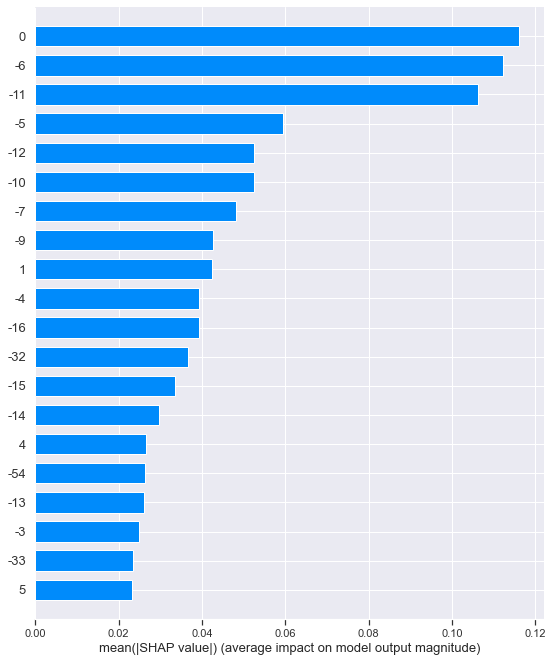

In [73]:
shap.summary_plot(shap_values,X_PCA_promoters, plot_type="bar", feature_names = X_PCA_promoters.columns)

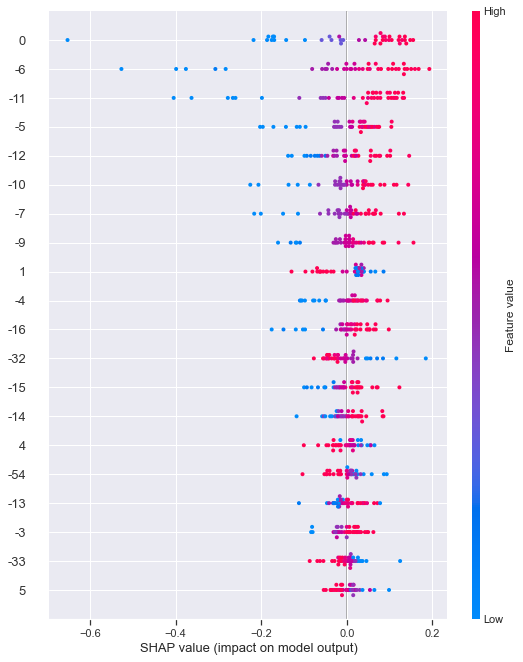

In [74]:
shap.summary_plot(shap_values, X_PCA_promoters, feature_names = X_PCA_promoters.columns)

AttributeError: 'int' object has no attribute 'split'

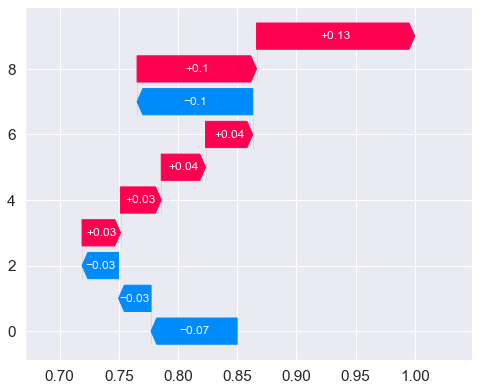

In [75]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[4], feature_names = X_PCA_promoters.columns)

In [76]:
shap.initjs()
shap.plots.force(explainer.expected_value, shap_values, feature_names = X_PCA_promoters.columns)

In [77]:
shap.initjs()
shap.plots.force(explainer.expected_value,shap_values[0], feature_names = X_PCA_promoters.columns)

# Test Organism Predictions

## Test Data

In [46]:
# Load the Test organisms dataset into a DataFrame
klebsiella = pd.read_csv(r"D:\ten organism\santalucia\test organism\stability_Sequences_80-20_sequences Klebsiella pneumoniae_output.csv")
salmonella= pd.read_csv(r"D:\ten organism\santalucia\test organism\stability_Sequences_80-20_sequences Salmonella enterica_output.csv")
klebsiella_downstream= pd.read_csv(r"D:\downstream control\santalucia\result\test organism\stability_Klebsiella pneumoniae_output.csv")
salmonella_downstream= pd.read_csv(r"D:\downstream control\santalucia\result\test organism\stability_Salmonella enterica_output.csv")

# Remove any irrelevant columns
test_organism = pd.concat([klebsiella,salmonella])
test_organism.columns=new_columns
test_organism.reset_index(drop=True, inplace=True)

test_organism_downstream= pd.concat([klebsiella_downstream,salmonella_downstream])
test_organism_downstream.columns=new_columns
test_organism_downstream.reset_index(drop=True, inplace=True)

test_without_labels= pd.concat([test_organism, test_organism_downstream])


In [47]:
test_line= pd.DataFrame(test_organism.mean())
test_line.reset_index(drop=False, inplace=True)
downstream_test_line=pd.DataFrame(test_organism_downstream.mean())
downstream_test_line.reset_index(drop= False, inplace=True)



[Text(0.5, 0, 'Nucleotide Position'),
 Text(0, 0.5, 'Stacking'),
 Text(0.5, 1.0, 'Santalucia Test Organism')]

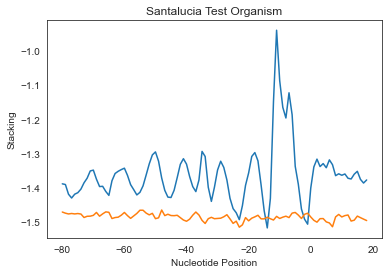

In [48]:
test_plot=sns.lineplot(x='index',y=0,data=test_line)
test_plot=sns.lineplot(x='index',y=0, data= downstream_test_line)

test_plot.set(xlabel ="Nucleotide Position", ylabel = "Stacking", title ='Santalucia Test Organism')

## Test Labels

In [49]:
test_organism_lables= np.ones(test_organism.shape[0], dtype=int)
test_downstream_labels= np.zeros(test_organism_downstream.shape[0], dtype=int)

test_labels = np.concatenate((test_organism_lables, test_downstream_labels))

In [50]:
test_without_labels.shape

(4620, 99)

## Test Prediction in One Go

In [51]:
# Create an array of ones with the same number of rows as the new dataset
#true_labels = np.ones(test_organism.shape[0], dtype=int)

# Make predictions on the new data
test_organism_pred = clf.predict(test_without_labels)

# Calculate the accuracy of the model on the new data
accuracy = metrics.accuracy_score(test_labels, test_organism_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8298701298701299


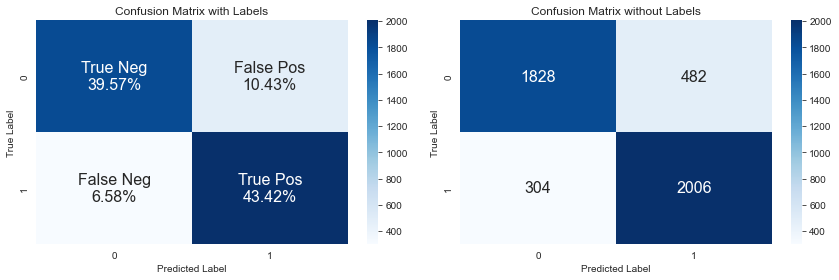

In [52]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(test_labels, test_organism_pred)

# Define labels for the four quadrants of the confusion matrix
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Reshape confusion matrix into a 1D array for plotting
cm_array = cm.ravel()

# Compute percentage values for each quadrant
percentages = ['{0:.2%}'.format(value) for value in cm_array / np.sum(cm_array)]

# Combine labels and percentages into a list of strings for plotting
labels = [f"{v1}\n{v2}" for v1, v2 in zip(labels, percentages)]

# Reshape labels into a 2D array for plotting
labels = np.asarray(labels).reshape(2,2)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot with labels
#sns.set(font_scale=1.4, ax=axes[0])
sns.heatmap(cm, annot=labels, annot_kws={"size": 16}, cmap='Blues', fmt='', ax=axes[0])
axes[0].set_title('Confusion Matrix with Labels')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot without labels
#sns.set(font_scale=1.4, ax=axes[1])
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix without Labels')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


## Test Prediction in 10 splits

In [53]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score

In [54]:
# Convert DataFrame to numpy array
if isinstance(test_without_labels, pd.DataFrame):
    test_without_labels = test_without_labels.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

test_accuracy = []
test_precision = []
test_recall = []
test_f1_score = []
test_mcc = []
test_specificity = []
all_cms = []

# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(test_without_labels, test_labels)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = test_without_labels[test_index]
    y_test = test_labels[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    test_accuracy.append(accuracy)
    test_precision.append(precision)
    test_recall.append(recall)
    test_f1_score.append(f1)
    
    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    all_cms.append(cm)
    
    # Calculate MCC
    mcc = matthews_corrcoef(y_test, y_pred)
    test_mcc.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    test_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
        test_accuracy[-1], test_precision[-1], test_recall[-1], test_f1_score[-1], test_mcc[-1], test_specificity[-1]))

Fold 1/10
 Accuracy: 0.8463203463203464, Precision: 0.8361344537815126, Recall: 0.8614718614718615, F1 Score: 0.8486140724946696, MCC: 0.6929589286752371, Specificity: 0.8311688311688312
Fold 2/10
 Accuracy: 0.8225108225108225, Precision: 0.7854406130268199, Recall: 0.8874458874458875, F1 Score: 0.8333333333333334, MCC: 0.6505309835871979, Specificity: 0.7575757575757576
Fold 3/10
 Accuracy: 0.7965367965367965, Precision: 0.7604562737642585, Recall: 0.8658008658008658, F1 Score: 0.8097165991902834, MCC: 0.5988473812140862, Specificity: 0.7272727272727273
Fold 4/10
 Accuracy: 0.8354978354978355, Precision: 0.8112449799196787, Recall: 0.8744588744588745, F1 Score: 0.8416666666666667, MCC: 0.673042087485094, Specificity: 0.7965367965367965
Fold 5/10
 Accuracy: 0.8311688311688312, Precision: 0.8047808764940239, Recall: 0.8744588744588745, F1 Score: 0.8381742738589211, MCC: 0.6648341852468552, Specificity: 0.7878787878787878
Fold 6/10
 Accuracy: 0.8311688311688312, Precision: 0.807228915662

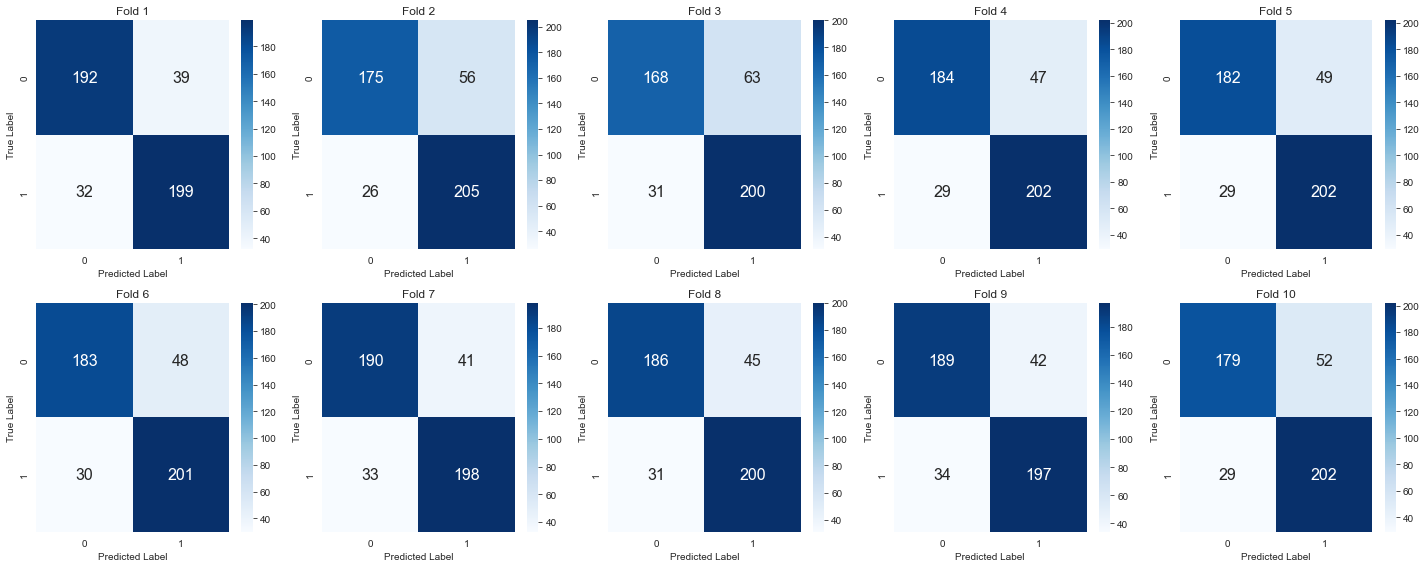

In [55]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
for i, ax in enumerate(axs.flatten()):
    if i < len(all_cms):
        cm = all_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


In [56]:
test_accuracy

[0.8463203463203464,
 0.8225108225108225,
 0.7965367965367965,
 0.8354978354978355,
 0.8311688311688312,
 0.8311688311688312,
 0.8398268398268398,
 0.8354978354978355,
 0.8354978354978355,
 0.8246753246753247]

In [57]:
test_precision

[0.8361344537815126,
 0.7854406130268199,
 0.7604562737642585,
 0.8112449799196787,
 0.8047808764940239,
 0.8072289156626506,
 0.8284518828451883,
 0.8163265306122449,
 0.8242677824267782,
 0.7952755905511811]

- Precision equal to 1.0 means that all the positive predictions made by the classifier are correct. 
- In other words, the classifier didn't make any false positive predictions. 

In [58]:
test_recall

[0.8614718614718615,
 0.8874458874458875,
 0.8658008658008658,
 0.8744588744588745,
 0.8744588744588745,
 0.8701298701298701,
 0.8571428571428571,
 0.8658008658008658,
 0.8528138528138528,
 0.8744588744588745]

In [59]:
test_specificity

[0.8311688311688312,
 0.7575757575757576,
 0.7272727272727273,
 0.7965367965367965,
 0.7878787878787878,
 0.7922077922077922,
 0.8225108225108225,
 0.8051948051948052,
 0.8181818181818182,
 0.7748917748917749]

In [60]:
test_f1_score

[0.8486140724946696,
 0.8333333333333334,
 0.8097165991902834,
 0.8416666666666667,
 0.8381742738589211,
 0.8375,
 0.8425531914893617,
 0.8403361344537814,
 0.8382978723404256,
 0.8329896907216495]

In [61]:
test_mcc

[0.6929589286752371,
 0.6505309835871979,
 0.5988473812140862,
 0.673042087485094,
 0.6648341852468552,
 0.6643576734530283,
 0.6800616274282792,
 0.6722313915102287,
 0.671398421983333,
 0.6525934841864919]

## Antisense Promoters with Downstream

###### Bacteria Names
- Chlamydia pneumoniae
- Corynebacterium glutamicum
- Helicobactor pylori
- Mycobacterium tuberculosis
- Nostoc sp
- Pseudomonas aeruginosa
- Salmonella enterica
- Streptomyces coelicolor
- Synechocystis sp

In [62]:
antisense= pd.read_csv(r"D:\Other promoters\Downstream sequences\Antisense\Antisense promoter vs downstream\Antisense santalucia promoter vs downstream.csv")
antisense

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-0.58,-1.30,-1.84,-1.30,-0.88,-1.00,-1.28,-1.28,-1.00,-1.00,...,-1.84,-1.45,-1.00,-1.00,-1.00,-1.30,-1.30,-1.00,-1.30,1
1,-1.30,-1.00,-1.30,-2.27,-2.24,-1.30,-0.88,-0.58,-1.00,-1.30,...,-1.00,-1.30,-2.27,-1.45,-0.88,-1.28,-1.84,-1.45,-1.00,1
2,-1.00,-1.28,-1.45,-0.88,-1.44,-1.30,-0.88,-0.58,-0.88,-0.58,...,-1.30,-2.27,-1.28,-1.28,-2.24,-1.44,-0.58,-1.00,-1.00,1
3,-1.28,-1.28,-0.58,-1.30,-1.30,-1.00,-1.30,-2.27,-1.28,-1.44,...,-1.44,-1.84,-1.30,-1.30,-1.30,-1.00,-1.00,-0.88,-1.44,1
4,-1.30,-1.84,-1.44,-0.58,-1.00,-1.00,-0.88,-0.58,-1.45,-1.84,...,-1.45,-1.30,-1.84,-2.27,-1.84,-1.84,-1.28,-1.28,-1.28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12163,-2.24,-1.44,-1.00,-1.00,-1.28,-1.84,-1.84,-1.84,-1.28,-1.00,...,-1.00,-1.28,-1.45,-0.88,-1.28,-2.24,-1.44,-1.28,-1.84,0
12164,-1.00,-1.28,-1.28,-1.00,-1.28,-2.24,-1.84,-1.44,-1.44,-2.27,...,-1.45,-1.84,-2.24,-1.84,-1.30,-1.30,-2.27,-2.24,-1.30,0
12165,-1.28,-1.44,-1.30,-0.88,-1.44,-1.84,-1.84,-1.84,-1.30,-1.30,...,-1.45,-1.28,-0.58,-1.00,-1.45,-1.45,-1.30,-2.27,-1.84,0
12166,-1.00,-1.30,-1.30,-0.88,-1.00,-1.44,-2.27,-2.24,-1.84,-1.84,...,-1.84,-1.84,-1.30,-1.45,-1.28,-1.00,-1.00,-0.58,-1.30,0


In [63]:
antisense_promoter= antisense.drop(columns=['label'])
antisense_label= antisense['label']

In [64]:
# Convert DataFrame to numpy array
if isinstance(antisense_promoter, pd.DataFrame):
    antisense_promoter = antisense_promoter.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

antisense_accuracy = []
antisense_precision=[]
antisense_recall=[]
antisense_f1_score=[]
antisense_cms = []
antisense_mcc = []
antisense_specificity = []

# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(antisense_promoter, antisense_label)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = antisense_promoter[test_index]
    y_test = antisense_label[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    antisense_accuracy.append(accuracy)
    antisense_precision.append(precision)
    antisense_recall.append(recall)
    antisense_f1_score.append(f1)
    
    # Calculate MCC
    mcc = matthews_corrcoef(y_test, y_pred)
    antisense_mcc.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    antisense_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
    antisense_accuracy[-1], antisense_precision[-1], antisense_recall[-1], antisense_f1_score[-1],
    antisense_mcc[-1], antisense_specificity[-1]))

    #fold_no += 1

    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    antisense_cms.append(cm)


Fold 1/10
 Accuracy: 0.7263763352506163, Precision: 0.7247557003257329, Recall: 0.7307060755336617, F1 Score: 0.7277187244480784, MCC: 0.4527638913985938, Specificity: 0.7748917748917749
Fold 2/10
 Accuracy: 0.7444535743631882, Precision: 0.7230538922155688, Recall: 0.7931034482758621, F1 Score: 0.7564604541895067, MCC: 0.49118074787134935, Specificity: 0.7220394736842105
Fold 3/10
 Accuracy: 0.7608874281018899, Precision: 0.7548076923076923, Recall: 0.7733990147783252, F1 Score: 0.7639902676399027, MCC: 0.5219234534790517, Specificity: 0.6957236842105263
Fold 4/10
 Accuracy: 0.7715694330320461, Precision: 0.7534456355283308, Recall: 0.8078817733990148, F1 Score: 0.779714738510301, MCC: 0.5445370275853901, Specificity: 0.7483552631578947
Fold 5/10
 Accuracy: 0.7633525061626951, Precision: 0.7564102564102564, Recall: 0.7763157894736842, F1 Score: 0.7662337662337663, MCC: 0.5268970861941106, Specificity: 0.7351973684210527
Fold 6/10
 Accuracy: 0.7452752670501233, Precision: 0.71911764705

In [65]:
antisense_accuracy

[0.7263763352506163,
 0.7444535743631882,
 0.7608874281018899,
 0.7715694330320461,
 0.7633525061626951,
 0.7452752670501233,
 0.7600657354149548,
 0.7576006573541495,
 0.7401315789473685,
 0.75]

In [66]:
antisense_precision

[0.7247557003257329,
 0.7230538922155688,
 0.7548076923076923,
 0.7534456355283308,
 0.7564102564102564,
 0.7191176470588235,
 0.7476489028213166,
 0.7449139280125195,
 0.7232415902140673,
 0.7367601246105919]

In [67]:
antisense_recall

[0.7307060755336617,
 0.7931034482758621,
 0.7733990147783252,
 0.8078817733990148,
 0.7763157894736842,
 0.8042763157894737,
 0.7845394736842105,
 0.7828947368421053,
 0.7779605263157895,
 0.7779605263157895]

In [68]:
antisense_specificity

[0.7748917748917749,
 0.7220394736842105,
 0.6957236842105263,
 0.7483552631578947,
 0.7351973684210527,
 0.7504105090311987,
 0.6863711001642037,
 0.735632183908046,
 0.7323481116584565,
 0.7023026315789473]

In [69]:
antisense_f1_score

[0.7277187244480784,
 0.7564604541895067,
 0.7639902676399027,
 0.779714738510301,
 0.7662337662337663,
 0.7593167701863355,
 0.7656500802568219,
 0.7634322373696871,
 0.7496038034865293,
 0.7568000000000001]

In [70]:
antisense_mcc

[0.4527638913985938,
 0.49118074787134935,
 0.5219234534790517,
 0.5445370275853901,
 0.5268970861941106,
 0.4940698502994231,
 0.5207838405245899,
 0.5158911292107154,
 0.4816436284731499,
 0.5007836294149051]

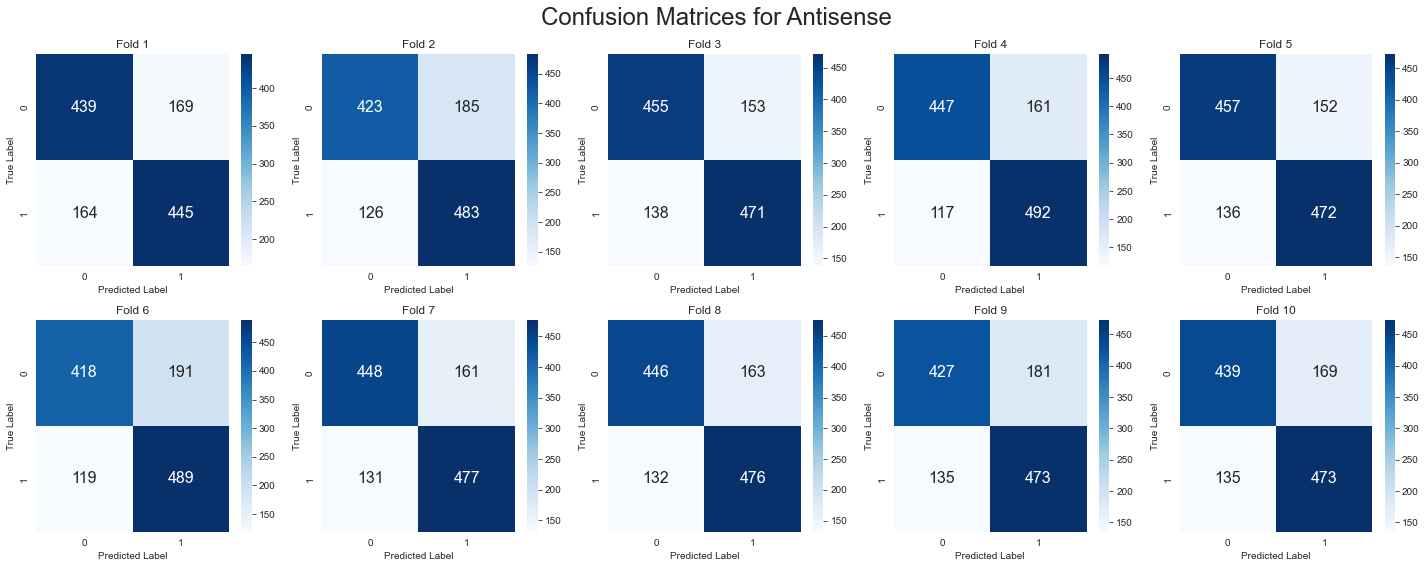

In [71]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("Confusion Matrices for Antisense", fontsize=24)

for i, ax in enumerate(axs.flatten()):
    if i < len(antisense_cms):
        cm = antisense_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


## Internal Promoter with downstream

#### Bacteria Names
- Chlamydia pneumoniae
- Corynebacterium glutamicum
- E.coli
- Helicobactor pylori
- Klebsiella pneumoniae
- Mycobacterium tuberculosis
- Nostoc sp
- Pseudomonas aeruginosa
- Streptomyces coelicolor

In [72]:
internal= pd.read_csv(r"D:\Other promoters\Downstream sequences\Induced\Induced promoter vs downstream\Induced santalucia promoter vs downstream.csv")
internal

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-1.28,-1.28,-2.24,-1.44,-0.58,-1.45,-2.24,-1.84,-1.84,-1.30,...,-1.00,-1.30,-1.30,-1.00,-1.00,-1.00,-0.88,-1.28,-1.45,1
1,-0.88,-1.28,-1.45,-1.00,-1.00,-0.88,-1.00,-1.00,-0.58,-1.45,...,-1.45,-1.30,-2.27,-1.28,-1.00,-0.58,-0.88,-1.44,-2.27,1
2,-1.84,-1.84,-2.27,-1.84,-1.45,-0.88,-1.44,-2.27,-1.45,-1.30,...,-1.30,-2.27,-1.45,-1.00,-0.88,-1.00,-1.44,-2.27,-1.28,1
3,-1.45,-1.45,-1.00,-1.45,-1.28,-1.44,-1.30,-0.88,-1.00,-0.58,...,-1.00,-1.00,-1.45,-2.24,-1.30,-1.00,-1.00,-0.88,-1.28,1
4,-1.28,-1.28,-1.28,-1.00,-1.00,-0.58,-1.00,-1.00,-0.88,-1.28,...,-1.45,-1.45,-1.00,-1.30,-1.30,-1.00,-1.00,-1.00,-0.88,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12125,-1.84,-2.27,-1.84,-1.84,-1.45,-1.45,-2.24,-1.84,-2.27,-2.24,...,-1.45,-1.00,-1.45,-1.28,-1.28,-1.84,-1.84,-2.24,-1.84,0
12126,-1.84,-2.24,-1.30,-1.45,-2.24,-2.27,-1.45,-1.00,-1.30,-2.27,...,-1.84,-2.27,-2.24,-1.30,-1.00,-1.45,-1.84,-2.24,-2.27,0
12127,-1.00,-1.30,-1.30,-1.00,-1.30,-1.30,-1.45,-1.84,-2.24,-1.30,...,-1.45,-1.45,-2.24,-2.27,-1.84,-1.45,-1.45,-1.84,-1.45,0
12128,-2.27,-1.84,-2.24,-1.30,-1.00,-1.30,-1.30,-1.45,-1.84,-1.45,...,-2.27,-2.24,-1.84,-1.30,-0.88,-1.28,-2.24,-1.84,-2.27,0


In [73]:
internal_promoter= internal.drop(columns=['label'])
internal_label= internal['label']

In [74]:
# Convert DataFrame to numpy array
if isinstance(internal_promoter, pd.DataFrame):
    internal_promoter = internal_promoter.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

internal_accuracy = []
internal_precision=[]
internal_recall=[]
internal_f1_score=[]
internal_cms = []
internal_mcc = []
internal_specificity = []


# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(internal_promoter, internal_label)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = internal_promoter[test_index]
    y_test = internal_label[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    internal_accuracy.append(accuracy)
    internal_precision.append(precision)
    internal_recall.append(recall)
    internal_f1_score.append(f1)
    internal_mcc.append(mcc)
    internal_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
    internal_accuracy[-1], internal_precision[-1], internal_recall[-1], internal_f1_score[-1],
    internal_mcc[-1], internal_specificity[-1]))
    #fold_no += 1

    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    internal_cms.append(cm)


Fold 1/10
 Accuracy: 0.7502061005770816, Precision: 0.7508250825082509, Recall: 0.7495881383855024, F1 Score: 0.7502061005770817, MCC: 0.5004132208937533, Specificity: 0.7220394736842105
Fold 2/10
 Accuracy: 0.7304204451772465, Precision: 0.7456140350877193, Recall: 0.700164744645799, F1 Score: 0.7221750212404418, MCC: 0.46172756086542666, Specificity: 0.7508250825082509
Fold 3/10
 Accuracy: 0.7180544105523495, Precision: 0.7257240204429302, Recall: 0.7018121911037891, F1 Score: 0.71356783919598, MCC: 0.4363610735785383, Specificity: 0.7607260726072608
Fold 4/10
 Accuracy: 0.7411376751854906, Precision: 0.7530224525043178, Recall: 0.7182866556836903, F1 Score: 0.7352445193929174, MCC: 0.48280945580350243, Specificity: 0.7343234323432343
Fold 5/10
 Accuracy: 0.7180544105523495, Precision: 0.7257240204429302, Recall: 0.7018121911037891, F1 Score: 0.71356783919598, MCC: 0.4363610735785383, Specificity: 0.764026402640264
Fold 6/10
 Accuracy: 0.7394888705688376, Precision: 0.736928104575163

In [75]:
internal_accuracy

[0.7502061005770816,
 0.7304204451772465,
 0.7180544105523495,
 0.7411376751854906,
 0.7180544105523495,
 0.7394888705688376,
 0.7485572959604286,
 0.7279472382522671,
 0.7180544105523495,
 0.7361912613355317]

In [76]:
internal_precision

[0.7508250825082509,
 0.7456140350877193,
 0.7257240204429302,
 0.7530224525043178,
 0.7257240204429302,
 0.7369281045751634,
 0.7487603305785124,
 0.729235880398671,
 0.7252559726962458,
 0.746551724137931]

In [77]:
internal_recall

[0.7495881383855024,
 0.700164744645799,
 0.7018121911037891,
 0.7182866556836903,
 0.7018121911037891,
 0.7442244224422442,
 0.7475247524752475,
 0.7244224422442245,
 0.7013201320132013,
 0.7145214521452146]

In [78]:
internal_specificity

[0.7220394736842105,
 0.7508250825082509,
 0.7607260726072608,
 0.7343234323432343,
 0.764026402640264,
 0.7343234323432343,
 0.7347611202635914,
 0.7495881383855024,
 0.7314662273476112,
 0.7347611202635914]

In [79]:
internal_f1_score

[0.7502061005770817,
 0.7221750212404418,
 0.71356783919598,
 0.7352445193929174,
 0.71356783919598,
 0.7405582922824301,
 0.7481420313790257,
 0.7268211920529802,
 0.7130872483221475,
 0.730185497470489]

In [80]:
internal_mcc

[0.5004132208937533,
 0.46172756086542666,
 0.4363610735785383,
 0.48280945580350243,
 0.4363610735785383,
 0.4790050761540176,
 0.49711424229674156,
 0.45590106369747974,
 0.43633042327770033,
 0.4727981889422717]

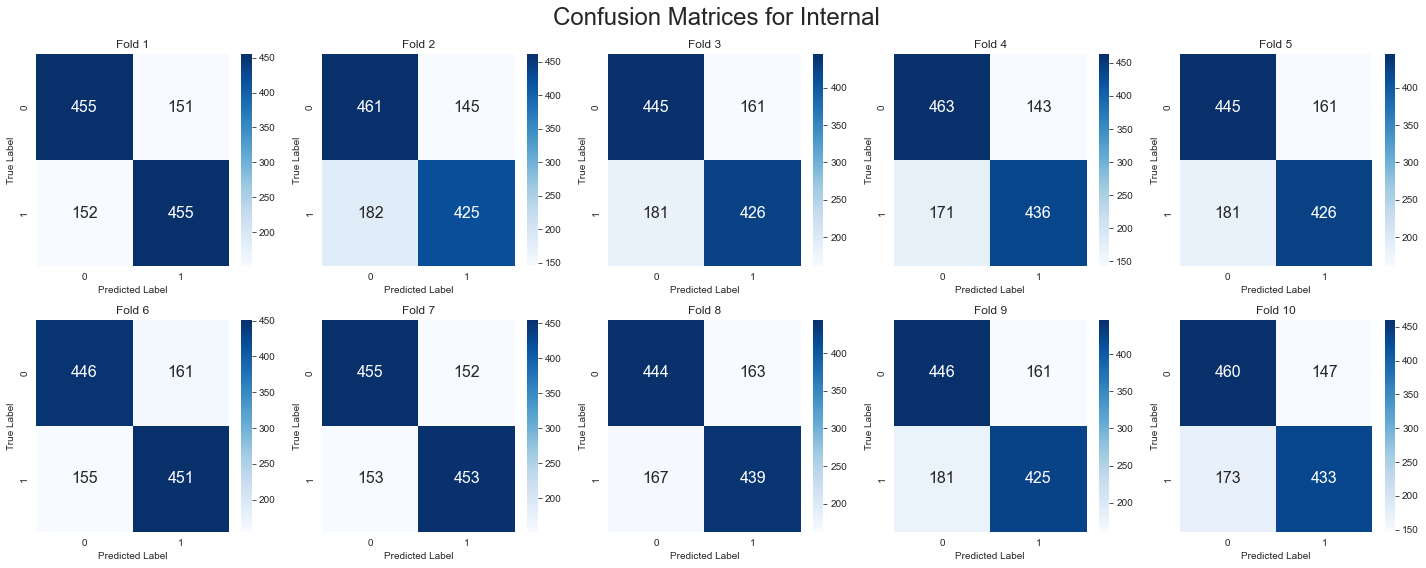

In [81]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("Confusion Matrices for Internal", fontsize=24)

for i, ax in enumerate(axs.flatten()):
    if i < len(internal_cms):
        cm = internal_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()
